## 3.2 Data preparation

In [34]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [36]:
# To better visualize the name of the columns
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [37]:
# fix name of columns
df.columns = df.columns.str.lower().str.replace(" ", "_")

# Get list of categorical type columns
categorical_columns = list(df.dtypes[df.dtypes.eq("object")].index)

for col in categorical_columns:
    df[col] = df[col].str.lower().str.replace(" ", "_")

In [38]:
df.head().T


,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [39]:
# Check why totalcharges is object and not numeric
df.loc[pd.to_numeric(df.totalcharges, errors="coerce").isna(),["customerid","totalcharges"]]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [40]:
# Parse totalcharges to numeric and replace invalids with NAN
df["totalcharges"] = pd.to_numeric(df.totalcharges, errors="coerce").fillna(0)

In [41]:
df.churn.unique()

array(['no', 'yes'], dtype=object)

In [42]:
# Parse yes to 1 no to 0
df["churn"] = df.churn.eq("yes").astype(int)

In [43]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [44]:
# Check for null values
df.isna().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

## 3.3 Setting up the validation framework
[video](https://www.youtube.com/watch?v=_lwz34sOnSE&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR)

- Perform the train/validation/test split with Scikit-Learn [ref](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)


In [45]:
from sklearn.model_selection import train_test_split

In [46]:
df_full_train, df_test = train_test_split(
    df,
    test_size=0.2,
    random_state=1,
)

In [47]:
df_train, df_val = train_test_split(
    df_full_train,
    test_size= (0.2 / 0.8),
    random_state=1,
)

In [48]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [49]:
# Reset index and get y vectors
target = "churn"

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train[target].values
y_val = df_val[target].values
y_test = df_test[target].values
        
del df_train[target] 
del df_val[target] 
del df_test[target] 

In [50]:
df_train.head().T

,0,1,2,3,4
customerid,8015-ihcgw,1960-uycnn,9250-wypll,6786-obwqr,1328-euzhc
gender,female,male,female,female,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,yes,yes
dependents,yes,no,no,yes,no
tenure,72,10,5,5,18
phoneservice,yes,yes,yes,yes,yes
multiplelines,yes,yes,yes,no,no
internetservice,fiber_optic,fiber_optic,fiber_optic,fiber_optic,no
onlinesecurity,yes,no,no,no,no_internet_service


## 3.4 EDA
[github](https://github.com/giraldiego/machine-learning-zoomcamp/blob/master/03-classification/04-eda.md)

[youtube](https://www.youtube.com/watch?v=BNF1wjBwTQA&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR)

The EDA for this project consisted of:

- Checking missing values
- Looking at the distribution of the target variable (churn)
- Looking at numerical and categorical variables


In [51]:
df_full_train = df_full_train.reset_index(drop=True)

In [52]:
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [53]:
global_churn_rate = df_full_train.churn.mean()
print(f"{global_churn_rate:.2f}")

0.27


In [54]:
numerical = list(df_full_train.dtypes[df_full_train.dtypes.ne("object")].index)[1:-1]
numerical

['tenure', 'monthlycharges', 'totalcharges']

In [55]:
categorical = [col for col in list(df_full_train.dtypes.index) if col not in numerical][1:-1]
categorical

['gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

In [56]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## Feature importance: Churn rate and risk ratio
[video](https://www.youtube.com/watch?v=fzdzPLlvs40&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR)




In [57]:
global_churn_rate

0.26996805111821087

In [58]:
df_full_train.groupby("gender")["churn"].mean().to_frame().assign(
    diff=lambda df_: global_churn_rate - df_.churn,
    ratio=lambda df_: df_.churn / global_churn_rate,
)

,churn,diff,ratio
gender,,,
female,0.276824,-0.006856,1.025396
male,0.263214,0.006755,0.974980


In [59]:
df_full_train.groupby("partner")["churn"].mean().to_frame().assign(
    diff=lambda df_: global_churn_rate - df_.churn,
    ratio=lambda df_: df_.churn / global_churn_rate,
)

,churn,diff,ratio
partner,,,
no,0.329809,-0.059841,1.221659
yes,0.205033,0.064935,0.759472


In [60]:
# from IPython import display

In [61]:
for col in categorical:
    print(col)
    df_group = (
        df_full_train.groupby(col)["churn"]
        .mean()
        .to_frame()
        .assign(
            diff=lambda df_: global_churn_rate - df_.churn,
            ratio=lambda df_: df_.churn / global_churn_rate,
        )
    )
    print(df_group)
    print("-" * 50)


gender
           churn      diff     ratio
gender                              
female  0.276824 -0.006856  1.025396
male    0.263214  0.006755  0.974980
--------------------------------------------------
seniorcitizen
                  churn      diff     ratio
seniorcitizen                              
0              0.242270  0.027698  0.897403
1              0.413377 -0.143409  1.531208
--------------------------------------------------
partner
            churn      diff     ratio
partner                              
no       0.329809 -0.059841  1.221659
yes      0.205033  0.064935  0.759472
--------------------------------------------------
dependents
               churn      diff     ratio
dependents                              
no          0.313760 -0.043792  1.162212
yes         0.165666  0.104302  0.613651
--------------------------------------------------
phoneservice
                 churn      diff     ratio
phoneservice                              
no            0.2

## 3.6 Feature importance: Mutual information
[video](https://www.youtube.com/watch?v=_u2YaGT6RN0&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR)


In [62]:
from sklearn.metrics import mutual_info_score

In [63]:
mutual_info_score(df_full_train.contract, df_full_train.churn)

0.0983203874041556

In [64]:
mutual_info_score(df_full_train.gender, df_full_train.churn)

0.0001174846211139946

In [65]:
mutual_info_score(df_full_train.partner, df_full_train.churn)

0.009967689095399745

In [66]:
df_full_train[categorical].apply(lambda s: mutual_info_score(s, df_full_train.churn)).sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

## 3.7 Feature importance: Correlation
[video](https://www.youtube.com/watch?v=mz1707QVxiY&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR)

**Correlation coefficient** measures the degree of dependency between two variables. This value is negative if one variable grows while the other decreases, and it is positive if both variables increase. Depending on its size, the dependency between both variables could be low, moderate, or strong. It allows measuring the importance of numerical variables. 

If `r` is correlation coefficient, then the correlation between two variables is:

- LOW when `r` is between [0, -0.2) or [0, 0.2)
- MEDIUM when `r` is between [-0.2, -0.5) or [2, 0.5)
- STRONG when `r` is between [-0.5, -1.0] or [0.5, 1.0]

Positive Correlation vs. Negative Correlation
* When `r` is positive, an increase in x will increase y.
* When `r` is negative, an increase in x will decrease y.
* When `r` is 0, a change in x does not affect y.

**Functions and methods:** 

* `df[x].corrwith(y)` - returns the correlation between x and y series. This is a function from pandas.

In [67]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

## 3.8 One-hot encoding
[video](https://www.youtube.com/watch?v=L-mjQFN5aR0&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR)

One-Hot Encoding allows encoding categorical variables in numerical ones. This method represents each category of a variable as one column, and a 1 is assigned if the value belongs to the category or 0 otherwise. 

**Classes, functions, and methods:** 

* `df[x].to_dict(oriented='records')` - convert x series to dictionaries, oriented by rows. 
* `DictVectorizer().fit_transform(x)` - Scikit-Learn class for converting x dictionaries into a sparse matrix, and in this way doing the one-hot encoding. It does not affect the numerical variables. 
* `DictVectorizer().get_feature_names()` -  returns the names of the columns in the sparse matrix.  

In [68]:
from sklearn.feature_extraction import DictVectorizer

In [69]:
df_train[["gender", "contract"]].head(10)

,gender,contract
0,female,two_year
1,male,month-to-month
2,female,month-to-month
3,female,month-to-month
4,female,two_year
5,male,month-to-month
6,male,month-to-month
7,female,month-to-month
8,female,two_year
9,female,month-to-month


In [70]:
dicts = df_train[["gender", "contract"]].head(100).to_dict(orient="records")
dicts

[{'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'one_year'},
 {'gender': 'male', 'contract': 'two_year'},
 {

In [71]:
dv = DictVectorizer(sparse=False)

In [72]:
dv.fit(dicts)

DictVectorizer(sparse=False)

In [73]:
dv.feature_names_

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'gender=female',
 'gender=male']

In [74]:
dv.transform(dicts)

array([[0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0.

In [75]:
train_dicts = df_train[categorical + numerical].to_dict(orient="records")

In [76]:
dv = DictVectorizer(sparse=False)

In [77]:
# fit and transform
X_train = dv.fit_transform(train_dicts)

In [78]:
val_dicts = df_val[categorical + numerical].to_dict(orient="records")

In [79]:
# fit and transform
X_val = dv.fit_transform(val_dicts)

## 3.9 Logistic regression
[video](https://www.youtube.com/watch?v=7KFE2ltnBAg&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR)

In general, supervised models follow can be represented with this formula: 

<p align="center">
    <img src="https://render.githubusercontent.com/render/math?math=\large g\left(x_{i}\right) = y_{i}"/>
</p>

Depending on what is the type of target variable, the supervised task can be regression or classification (binary or multiclass). Binary classification tasks can have negative (0) or positive (1) target values. The output of these models is the probability of xi belonging to the positive class.  

Logistic regression is similar to linear regression because both models take into account the bias term and weighted sum of features. The difference between these models is that the output of linear regression is a real number, while logistic regression outputs a value between zero and one, applying the sigmoid function to the linear regression formula. 

<p align="center">
    <img src="https://render.githubusercontent.com/render/math?math=\large g\left(x_{i}\right) = Sigmoid\left(w_{0} %2B w_{1}x_{1} %2B w_{2}x_{2} %2B ... %2B w_{n}x_{n}\right)"/>
</p>

<p align="center">
    <img src="https://render.githubusercontent.com/render/math?math=\large Sigmoid=\frac{1}{1%2Bexp\left( -z \right)}"/>
</p>

In this way, the sigmoid function allows transforming a score into a probability. 

In [80]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

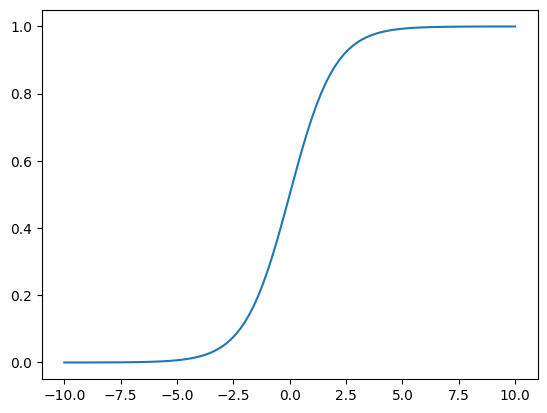

In [81]:
z = np.linspace(-10, 10, 101)
plt.plot(z, sigmoid(z))

In [82]:
def linear_regression(xi):
    result = w0

    for j in range(len(xi)):
        result += xi[j] * w[j]
    
    return result


In [83]:
def logistic_regression(xi):
    score = w0

    for j in range(len(xi)):
        score += xi[j] * w[j]
    
    return sigmoid(score)


## 3.10 Training logistic regression with Scikit-Learn
[video](https://www.youtube.com/watch?v=hae_jXe2fN0&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR)

This video was about training a logistic regression model with Scikit-Learn, applying it to the validation dataset, and calculating its accuracy. 

**Classes, functions, and methods:** 

* `LogisticRegression().fit_transform(x)` - Scikit-Learn class for calculating the logistic regression model. 
* `LogisticRegression().coef_[0]` - returns the coeffcients or weights of the LR model
* `LogisticRegression().intercept_[0]` - returns the bias or intercept of the LR model
* `LogisticRegression().predict[x]` - make predictions on the x dataset 
* `LogisticRegression().predict_proba[x]` - make predictions on the x dataset, and returns two columns with their probabilities for the two categories - soft predictions 

In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [86]:
model.intercept_[0]

-0.1090367498730804

In [87]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.316, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [88]:
model.predict(X_train)

array([0, 1, 1, ..., 1, 0, 1])

In [127]:
model.predict(X_train).shape

(4225,)

In [89]:
model.predict_proba(X_train)

array([[0.90452087, 0.09547913],
       [0.32067001, 0.67932999],
       [0.36631915, 0.63368085],
       ...,
       [0.46838898, 0.53161102],
       [0.9574582 , 0.0425418 ],
       [0.30127077, 0.69872923]])

In [90]:
# 1st column is prob for 0, 2nd for 1
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.00899673, 0.20451183, 0.2122123 , ..., 0.13638848, 0.79976917,
       0.83740611])

In [91]:
# People will churn if prob >= 0.5
churn_decision = (y_pred >= 0.5)

In [92]:
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

In [93]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

In [94]:
(y_val == churn_decision).mean()

0.8034066713981547

## 3.11 Model interpretation
[video](https://www.youtube.com/watch?v=OUrlxnUAAEA&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR)

[Slides](https://www.slideshare.net/AlexeyGrigorev/ml-zoomcamp-3-machine-learning-for-classification)


## Notes

This video was about the interpretation of coefficients, and training a model with fewer features. 

In the formula of the logistic regression model, only one of the one-hot encoded categories is multiplied by 1, and the other by 0. In this way, we only consider the appropriate category for each categorical feature. 

**Classes, functions, and methods:** 

* `zip(x,y)` - returns a new list with elements from x joined with their corresponding elements on y 


In [95]:
dict(zip(list(dv.get_feature_names_out()), model.coef_[0].round(3)))

{'contract=month-to-month': 0.475,
 'contract=one_year': -0.175,
 'contract=two_year': -0.408,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.316,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.284,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.07,
 

In [96]:
# Let's try a smalle model
small = ["contract", "tenure", "monthlycharges"]

In [97]:
df_train[small].iloc[:10].to_dict(orient="records")

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [98]:
dicts_train_small = df_train[small].to_dict(orient="records")
dicts_val_small = df_val[small].to_dict(orient="records")

In [99]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [100]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [101]:
X_train_small = dv_small.transform(dicts_train_small)

In [102]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [103]:
w0 = model_small.intercept_[0]
w0

-2.4767756603009743

In [104]:
w = model_small.coef_[0]
w.round(3)

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [105]:
dict(zip(list(dv_small.get_feature_names_out()), model_small.coef_[0].round(3)))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

In [106]:
sigmoid(-2.47 + .97 + 50 *.027 + 5 * (-.036))

0.41824062315816374

In [107]:
xi = np.array([1, 0, 0, 50, 5])
logistic_regression(xi)

0.42225242668586305

## 3.12 Using the model

[video](https://www.youtube.com/watch?v=Y-NGmnFpNuM&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR)

[Slides](https://www.slideshare.net/AlexeyGrigorev/ml-zoomcamp-3-machine-learning-for-classification)

In [108]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient="records")
dicts_full_train

[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'no',
  'onlinesecurity': 'no_internet_service',
  'onlinebackup': 'no_internet_service',
  'deviceprotection': 'no_internet_service',
  'techsupport': 'no_internet_service',
  'streamingtv': 'no_internet_service',
  'streamingmovies': 'no_internet_service',
  'contract': 'two_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'mailed_check',
  'tenure': 12,
  'monthlycharges': 19.7,
  'totalcharges': 258.35},
 {'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'credit_card_(automatic)',
  'tenur

In [109]:
dv = DictVectorizer(sparse=False)
X_full_tran = dv.fit_transform(dicts_full_train)
X_full_tran

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        1.20000e+01, 2.58350e+02],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        4.20000e+01, 3.16055e+03],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.10000e+01, 4.68175e+03],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.80000e+01, 2.97950e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.00000e+00, 1.14100e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        1.60000e+01, 1.11485e+03]])

In [116]:
y_full_train = df_full_train.churn.values

In [117]:
model = LogisticRegression()
model.fit(X_full_tran, y_full_train)

LogisticRegression()

In [122]:
dicts_test = df_test[categorical + numerical].to_dict(orient="records")
# dicts_test

In [123]:
dv = DictVectorizer(sparse=False)
X_test = dv.fit_transform(dicts_test)

In [130]:
y_pred = model.predict_proba(X_test)[:,1]

In [132]:
churn_decision = (y_pred >= 0.5)

In [134]:
(churn_decision == y_test).mean()

0.815471965933286

In [138]:
# Take a random subject
customer = dicts_test[10]
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [141]:
X_customer = dv.transform([customer])
X_customer

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 9.39500e+01, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 3.20000e+01, 2.86145e+03]])

In [145]:
model.predict_proba(X_customer)[0, 1] >= 0.5

False

In [144]:
y_test[10]

0